In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stats

In [75]:
df = pd.read_csv('churn.csv')

In [76]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [78]:
# Here State, area code, phone number are not useful for our analysis. So we will drop these columns.
churn = df.drop(['State', 'Area Code', 'Phone'], axis = 1)

In [79]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Int'l Plan      3333 non-null   object 
 2   VMail Plan      3333 non-null   object 
 3   VMail Message   3333 non-null   int64  
 4   Day Mins        3333 non-null   float64
 5   Day Calls       3333 non-null   int64  
 6   Day Charge      3333 non-null   float64
 7   Eve Mins        3333 non-null   float64
 8   Eve Calls       3333 non-null   int64  
 9   Eve Charge      3333 non-null   float64
 10  Night Mins      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Mins       3333 non-null   float64
 14  Intl Calls      3333 non-null   int64  
 15  Intl Charge     3333 non-null   float64
 16  CustServ Calls  3333 non-null   int64  
 17  Churn?          3333 non-null   o

In [80]:
churn['Int\'l Plan'].value_counts()

Int'l Plan
no     3010
yes     323
Name: count, dtype: int64

In [81]:
churn['VMail Plan'].value_counts()

VMail Plan
no     2411
yes     922
Name: count, dtype: int64

In [82]:
# I want for VMail Plan and Int'l Plan, No = 0 and Yes = 1
churn["VMail Plan"] = churn["VMail Plan"].map({"no": 0, "yes": 1})
churn["Int'l Plan"] = churn["Int'l Plan"].map({"no": 0, "yes": 1})
churn[["VMail Plan", "Int'l Plan"]].head()

,VMail Plan,Int'l Plan
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


In [83]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Int'l Plan      3333 non-null   int64  
 2   VMail Plan      3333 non-null   int64  
 3   VMail Message   3333 non-null   int64  
 4   Day Mins        3333 non-null   float64
 5   Day Calls       3333 non-null   int64  
 6   Day Charge      3333 non-null   float64
 7   Eve Mins        3333 non-null   float64
 8   Eve Calls       3333 non-null   int64  
 9   Eve Charge      3333 non-null   float64
 10  Night Mins      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Mins       3333 non-null   float64
 14  Intl Calls      3333 non-null   int64  
 15  Intl Charge     3333 non-null   float64
 16  CustServ Calls  3333 non-null   int64  
 17  Churn?          3333 non-null   o

In [84]:
churn['Churn?'].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [85]:
churn['Churn?'] = churn['Churn?'].map({'False.': 0, 'True.': 1})

In [86]:
churn.head()


,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [87]:
# So this is a imbalance dataset(we will learn how to build a machine learning model with imbalance in imbalance learning topic)
churn['Churn?'].value_counts(normalize=1)

Churn?
0    0.855086
1    0.144914
Name: proportion, dtype: float64

<Axes: xlabel='Churn?', ylabel='Account Length'>

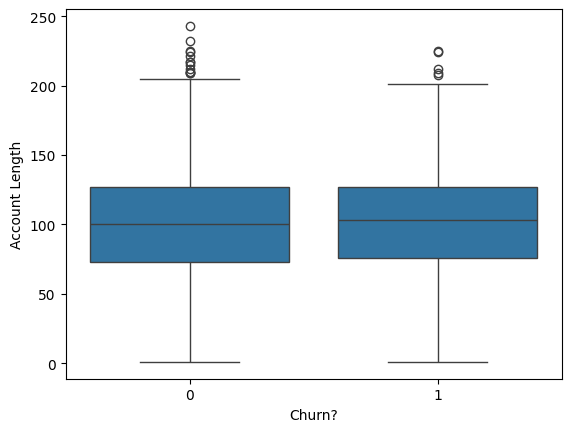

In [88]:
# EDA for selecting variable
sns.boxplot(x = 'Churn?', y='Account Length', data=churn)
# This two variable does not make any sence 

<Axes: xlabel='Churn?', ylabel='Day Mins'>

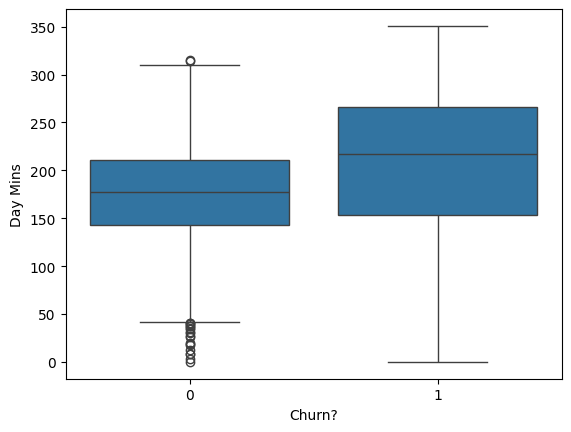

In [89]:
sns.boxplot(x = 'Churn?', y='Day Mins', data=churn)

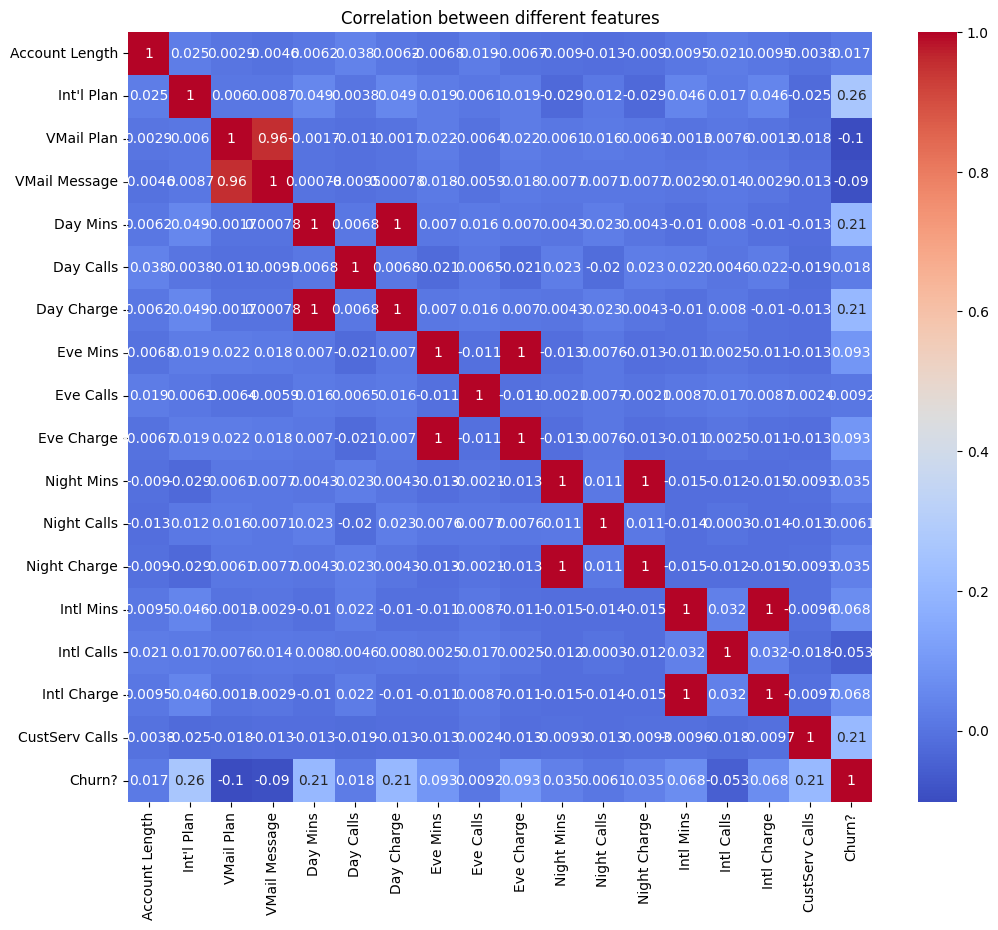

In [90]:
plt.figure(figsize=(12, 10))
sns.heatmap(churn.corr() ,annot=True, cmap='coolwarm')
plt.title('Correlation between different features')
plt.show()

In [91]:
target = churn['Churn?']
X = churn.drop(['Churn?'], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\Users\sangram.samanta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Problem
<b>Here we face a problem that "lbfgs failed to converge after 100 iteration(s) (status=1)"</b>
It's mean that it can't complete some task for many garbage varable. So, we can't use the model in production

In [96]:
logit.intercept_ #theta 0

array([-0.04358233])

In [97]:
logit.coef_

array([[-2.03061237e-03,  2.08226471e-01, -1.77844596e-02,
        -2.55145299e-02,  8.51234105e-03, -1.01453793e-02,
         1.46081661e-03,  1.40238777e-03, -1.02970551e-02,
         1.63766658e-04, -9.87101197e-04, -1.23725492e-02,
        -3.83427398e-05, -5.94220011e-03, -1.33705164e-01,
        -1.67345104e-03,  4.43186026e-01]])

In [98]:
import statsmodels.api as sm

In [99]:
X_train_sm = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.318565
         Iterations 7


In [100]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Churn?   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2648
Method:                           MLE   Df Model:                           17
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                  0.2285
Time:                        16:41:05   Log-Likelihood:                -849.30
converged:                       True   LL-Null:                       -1100.8
Covariance Type:            nonrobust   LLR p-value:                 4.538e-96
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.6412      0.820    -10.534      0.000     -10.249      -7.033
Account Length     0.0008      0.002      0.492      0.623      -0.002       0.004
Int'l Plan         2.0872      0.163

In [101]:
coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(), header=0, index_col=0)[0]

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_10612\359570625.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(), header=0, index_col=0)[0]


In [102]:
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975]
const,-8.641200,0.820,-10.534,0.000,-10.249,-7.033
Account Length,0.000800,0.002,0.492,0.623,-0.002,0.004
Int'l Plan,2.087200,0.163,12.839,0.000,1.769,2.406
VMail Plan,-1.936200,0.655,-2.955,0.003,-3.221,-0.652
VMail Message,0.032600,0.020,1.597,0.110,-0.007,0.073
Day Mins,-1.286400,3.684,-0.349,0.727,-8.507,5.935
Day Calls,0.002500,0.003,0.798,0.425,-0.004,0.009
Day Charge,7.641200,21.672,0.353,0.724,-34.835,50.118
Eve Mins,-0.460900,1.838,-0.251,0.802,-4.062,3.141
Eve Calls,0.003100,0.003,0.996,0.319,-0.003,0.009


In [103]:
coef_sm["odds_ratio"] = np.exp(coef_sm["coef"])

In [104]:
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
const,-8.641200,0.820,-10.534,0.000,-10.249,-7.033,0.000177
Account Length,0.000800,0.002,0.492,0.623,-0.002,0.004,1.000800
Int'l Plan,2.087200,0.163,12.839,0.000,1.769,2.406,8.062309
VMail Plan,-1.936200,0.655,-2.955,0.003,-3.221,-0.652,0.144251
VMail Message,0.032600,0.020,1.597,0.110,-0.007,0.073,1.033137
Day Mins,-1.286400,3.684,-0.349,0.727,-8.507,5.935,0.276264
Day Calls,0.002500,0.003,0.798,0.425,-0.004,0.009,1.002503
Day Charge,7.641200,21.672,0.353,0.724,-34.835,50.118,2082.241007
Eve Mins,-0.460900,1.838,-0.251,0.802,-4.062,3.141,0.630716
Eve Calls,0.003100,0.003,0.996,0.319,-0.003,0.009,1.003105


In [105]:
# Predictions from statsmodel
X_test_sm = sm.add_constant(X_test)
pred_sm = sm_model.predict(X_test_sm)

In [106]:
pred = np.where(pred_sm > 0.5, 1.0, 0.0)

In [107]:
y_pred = logit.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [109]:
print("stats Model")
print(confusion_matrix(y_test, pred) )
print("skllearn model")
print(confusion_matrix(y_test, y_pred))

stats Model
[[551  18]
 [ 82  16]]
skllearn model
[[561   8]
 [ 91   7]]


In [110]:
precision_score(y_test, y_pred)

0.4666666666666667

In [111]:
recall_score(y_test, y_pred)

0.07142857142857142

In [112]:
pred = np.where(pred_sm>0.3, 1.0, 0.0)
confusion_matrix(y_test, pred)

array([[521,  48],
       [ 60,  38]])

In [113]:
precision_score(y_test, pred)

0.4418604651162791

In [114]:
recall_score(y_test, pred)

0.3877551020408163

In [115]:
y_pred = logit.predict_proba(X_test)

In [116]:
y_pred

array([[0.75926512, 0.24073488],
       [0.90942656, 0.09057344],
       [0.79652256, 0.20347744],
       ...,
       [0.869879  , 0.130121  ],
       [0.94940546, 0.05059454],
       [0.8740917 , 0.1259083 ]], shape=(667, 2))

In [117]:
from sklearn.metrics import roc_curve, auc

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1], pos_label=1)

In [119]:
roc_auc = auc(fpr, tpr)

[]

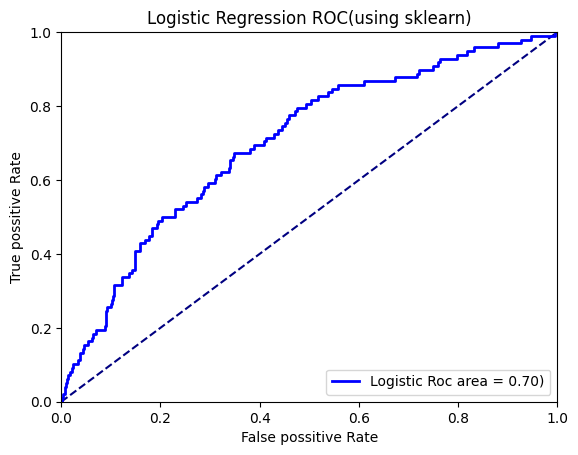

In [120]:
plt.figure()
plt.xlabel("False possitive Rate")
plt.ylabel("True possitive Rate")
plt.plot([0,1], [0,1], color="navy", linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Logistic Regression ROC(using sklearn)")
plt.plot(fpr, tpr, color="blue", lw=2, label="Logistic Roc area = %0.2f)"% roc_auc)
plt.legend(loc="lower right")
plt.plot()

In [121]:
y_pred = sm_model.predict(X_test_sm)

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

[]

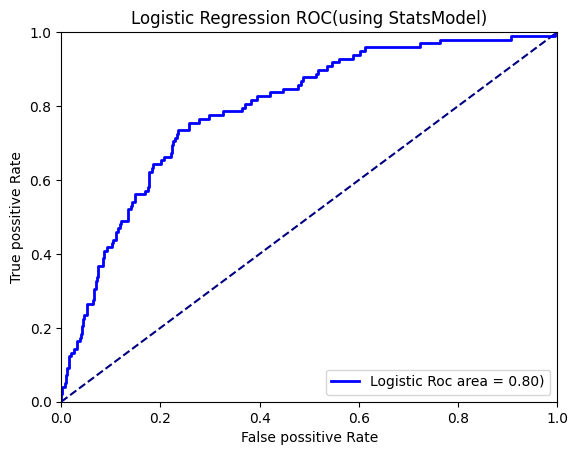

In [123]:
plt.figure()
plt.xlabel("False possitive Rate")
plt.ylabel("True possitive Rate")
plt.plot([0,1], [0,1], color="navy", linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Logistic Regression ROC(using StatsModel)")
plt.plot(fpr, tpr, color="blue", lw=2, label="Logistic Roc area = %0.2f)"% roc_auc)
plt.legend(loc="lower right")
plt.plot()

#### Which model is best accroding to ROC graph?
<b>StatsModel's model is better then sklearn because in sklearn we need to scale the data(using standardization)</b>

In [124]:
churn.columns

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In [125]:
# Without this feature other have either Multi-colinearity or Makes noise in the model
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', "Int'l Plan", 'VMail Message']
X_tr = X_train[cols]
X_te = X_test[cols]

X_te.columns

Index(['Day Mins', 'Eve Mins', 'CustServ Calls', 'Int'l Plan',
       'VMail Message'],
      dtype='object')

In [126]:
logModel = LogisticRegression()
logModel.fit(X_tr, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [127]:
logModel.coef_

array([[ 0.01212932,  0.00613307,  0.5197112 ,  2.00652011, -0.02657979]])

In [128]:
logModel.intercept_

array([-6.4457952])

In [129]:
coef = np.array(logModel.coef_)
coef = coef.reshape([len(cols),])
var_coef = pd.DataFrame({'Vars':cols, 'coef':coef})
var_coef["odd_ratio"] = np.exp(var_coef['coef'])

In [130]:
var_coef

,Vars,coef,odd_ratio
0,Day Mins,0.012129,1.012203
1,Eve Mins,0.006133,1.006152
2,CustServ Calls,0.519711,1.681542
3,Int'l Plan,2.006520,7.437391
4,VMail Message,-0.026580,0.973770


In [131]:
pred = logModel.predict(X_te) # default cutoff 0.5


In [132]:
confusion_matrix(y_test, pred)

array([[556,  13],
       [ 86,  12]])

In [133]:
prob = logModel.predict_proba(X_te)

In [134]:
pred = np.where(prob[:,1]>0.3, 1, 0)

In [135]:
confusion_matrix(y_test, pred)

array([[513,  56],
       [ 68,  30]])

In [136]:
precision_score(y_test, pred)

0.3488372093023256

In [137]:
recall_score(y_test, pred)

0.30612244897959184

In [141]:
y_pred = logModel.predict_proba(X_te)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_pred[:,1], pos_label=1)
lr_roc_auc = auc(lr_fpr, lr_tpr)

[]

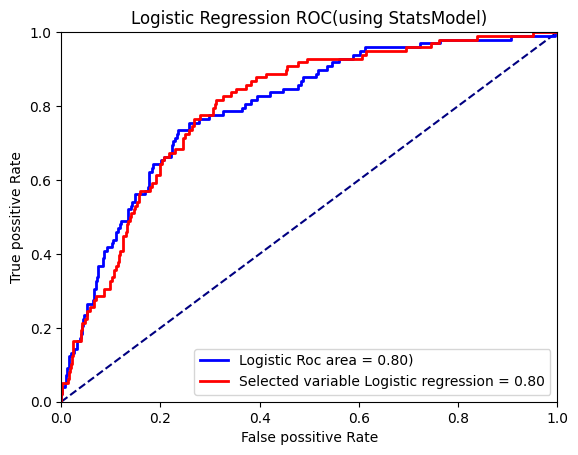

In [142]:
plt.figure()
plt.xlabel("False possitive Rate")
plt.ylabel("True possitive Rate")
plt.plot([0,1], [0,1], color="navy", linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Logistic Regression ROC(using StatsModel)")
plt.plot(fpr, tpr, color="blue", lw=2, label="Logistic Roc area = %0.2f)"% roc_auc)
plt.plot(lr_fpr, lr_tpr, color="red", lw=2, label="Selected variable Logistic regression = %0.2f"% lr_roc_auc)
plt.legend(loc="lower right")
plt.plot()

##### After all of this changes sklearn logistic regression model can't serpass the AUC value of statsmodel's logistic regration model. Maybe because of we did not scale the data

In [143]:
from sklearn.metrics import precision_recall_curve

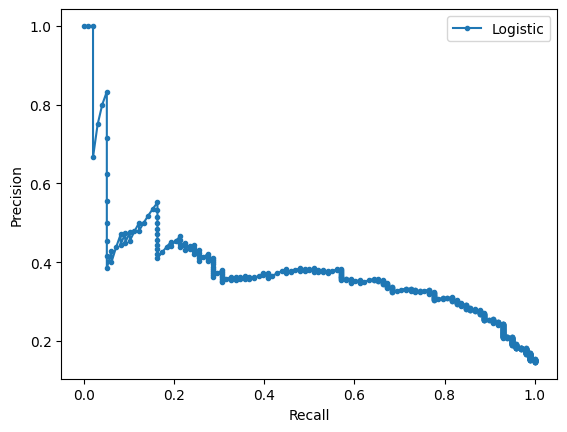

In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(recall, precision, marker ='.', label="Logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [151]:
def prcurve(probs, actuals, cuts=np.arange(0.05,0.95,0.05)):
    precision = np.zeros(len(cuts))
    recall = np.zeros(len(cuts))

    for i in np.arange(len(cuts)):
        y_preds = np.where(probs[:, 1]>cuts[i], 1,0)
        precision[i] = precision_score(actuals, y_preds)
        recall[i] = recall_score(actuals, y_preds)

    fig, ax = plt.subplots(figsize=[15,8])
    plt.plot(recall,precision, marker='o', linestyle='dashed', label=cuts)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision Vs Recall curve")

    for x,y,z in zip(recall, precision,cuts):
        label = format(z)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,5),
                    ha='center'
                     )

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_10612\578083045.py:11: MatplotlibDeprecationWarning: Passing label as a length 18 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(recall,precision, marker='o', linestyle='dashed', label=cuts)


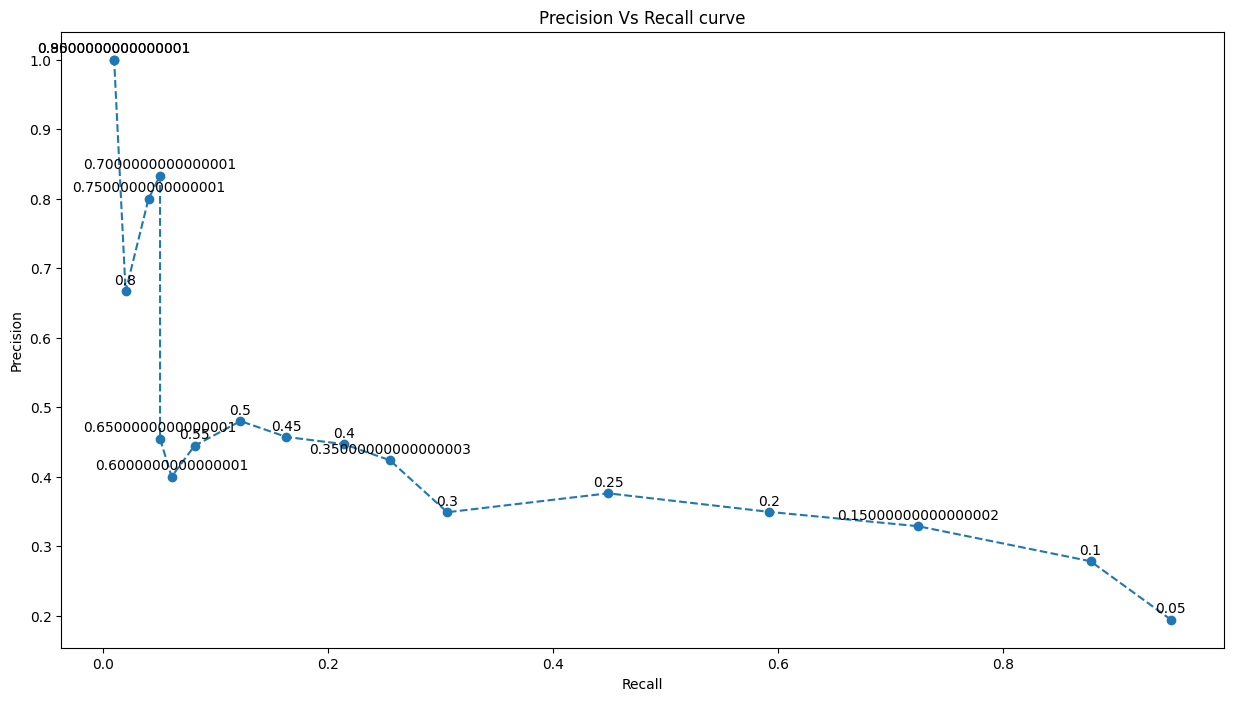

In [152]:
prcurve(prob, y_test)

In [153]:
chart_data = X_test[['Day Mins', 'Eve Mins', 'CustServ Calls', "Int'l Plan", 'VMail Message']]

In [154]:
chart_data["prob"] = prob[:, 1]

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_10612\3111209479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["prob"] = prob[:, 1]


In [156]:
chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 2360 to 748
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day Mins        667 non-null    float64
 1   Eve Mins        667 non-null    float64
 2   CustServ Calls  667 non-null    int64  
 3   Int'l Plan      667 non-null    int64  
 4   VMail Message   667 non-null    int64  
 5   prob            667 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 36.5 KB


In [157]:
chart_data = chart_data.sort_values(by="prob", ascending=False)

In [158]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob
2732,216.2,363.7,5,1,0,0.953124
546,279.8,248.7,2,1,0,0.820424
1044,243.2,147.0,4,1,0,0.816226
3255,286.2,187.2,2,1,0,0.772005
3304,186.1,198.6,4,1,0,0.753035


In [159]:
# Sort the dataset base on probability
chart_data["decile"] = pd.qcut(chart_data['prob'], 10)

In [160]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile
2732,216.2,363.7,5,1,0,0.953124,"(0.337, 0.953]"
546,279.8,248.7,2,1,0,0.820424,"(0.337, 0.953]"
1044,243.2,147.0,4,1,0,0.816226,"(0.337, 0.953]"
3255,286.2,187.2,2,1,0,0.772005,"(0.337, 0.953]"
3304,186.1,198.6,4,1,0,0.753035,"(0.337, 0.953]"


In [161]:
chart_data["row"] = np.arange(1, chart_data.shape[0]+1)

In [162]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row
2732,216.2,363.7,5,1,0,0.953124,"(0.337, 0.953]",1
546,279.8,248.7,2,1,0,0.820424,"(0.337, 0.953]",2
1044,243.2,147.0,4,1,0,0.816226,"(0.337, 0.953]",3
3255,286.2,187.2,2,1,0,0.772005,"(0.337, 0.953]",4
3304,186.1,198.6,4,1,0,0.753035,"(0.337, 0.953]",5


In [163]:
chart_data["decile1"] = np.ceil(chart_data["row"]/((chart_data.shape[0]+1)/10))

In [164]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row,decile1
2732,216.2,363.7,5,1,0,0.953124,"(0.337, 0.953]",1,1.0
546,279.8,248.7,2,1,0,0.820424,"(0.337, 0.953]",2,1.0
1044,243.2,147.0,4,1,0,0.816226,"(0.337, 0.953]",3,1.0
3255,286.2,187.2,2,1,0,0.772005,"(0.337, 0.953]",4,1.0
3304,186.1,198.6,4,1,0,0.753035,"(0.337, 0.953]",5,1.0


In [165]:
chart_data.decile1.value_counts()

decile1
2.0     67
3.0     67
9.0     67
4.0     67
5.0     67
7.0     67
8.0     67
1.0     66
6.0     66
10.0    66
Name: count, dtype: int64

In [171]:
y_test.value_counts()

Churn?
0    569
1     98
Name: count, dtype: int64

In [168]:
chart_data["target"] = y_test.astype(int)

In [172]:
chart_data.head()

,Day Mins,Eve Mins,CustServ Calls,Int'l Plan,VMail Message,prob,decile,row,decile1,target
2732,216.2,363.7,5,1,0,0.953124,"(0.337, 0.953]",1,1.0,1
546,279.8,248.7,2,1,0,0.820424,"(0.337, 0.953]",2,1.0,1
1044,243.2,147.0,4,1,0,0.816226,"(0.337, 0.953]",3,1.0,0
3255,286.2,187.2,2,1,0,0.772005,"(0.337, 0.953]",4,1.0,1
3304,186.1,198.6,4,1,0,0.753035,"(0.337, 0.953]",5,1.0,1


In [173]:
lift = chart_data.groupby("decile1").agg(
    Number_of_customers=('target', 'count'),   # Total number of customers in the decile
    Number_of_left=('target', 'sum')           # Total number of bad customers (Risk=1)
).sort_index(ascending=True)

lift['Cumulative left'] = lift['Number_of_left'].cumsum()  # Cumulative sum of bads
lift['Percent of Events'] = lift['Number_of_left'] / lift['Number_of_left'].sum() * 100
lift['Gain'] = lift['Percent of Events'].cumsum()
lift['Lift'] = lift['Gain'] / np.array(range(10, 100+10, 10))
lift.head(10)

,Number_of_customers,Number_of_left,Cumulative left,Percent of Events,Gain,Lift
decile1,,,,,,
1.0,66,27,27,27.551020,27.551020,2.755102
2.0,67,23,50,23.469388,51.020408,2.551020
3.0,67,17,67,17.346939,68.367347,2.278912
4.0,67,14,81,14.285714,82.653061,2.066327
5.0,67,6,87,6.122449,88.775510,1.775510
6.0,66,4,91,4.081633,92.857143,1.547619
7.0,67,2,93,2.040816,94.897959,1.355685
8.0,67,3,96,3.061224,97.959184,1.224490
9.0,67,1,97,1.020408,98.979592,1.099773


### If we see the cumulative left column then we can say that top 4 decile cover 81 percent risky customer
# This chart call left gain chart 

<Axes: xlabel='decile1', ylabel='count'>

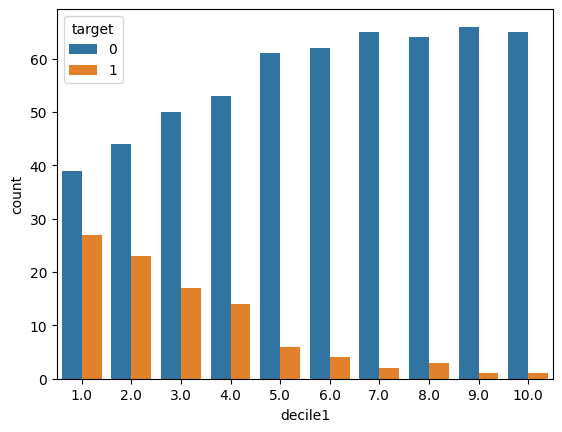

In [ ]:
sns.countplot(x="decile1", hue="target", data=chart_data)
# Here our banchmark is 14.5%. As per this banchmark we did well in this model